In [1]:
import scipy.io
import pandas as pd
import numpy as np
import os.path
from os import path
from os.path import exists
import matplotlib.pyplot as plt

In [23]:
def Read(path,index,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb):
    filename = "data_virusprods{}_virusdiff{}_ifnprods{}_ifndiff{}_ifnprob{}_virusreduct{}_isstochastic{}_initialvirus{}_{}_{}_run{}".format(ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb,index)                                            
    df = pd.read_csv("./{}/data/{}.csv".format(path,filename))
    
    return df

def AllRead(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb):
    result = []
    for i in range(InitialRun,FinalRun):
        filename = "./{}/data/data_virusprods{}_virusdiff{}_ifnprods{}_ifndiff{}_ifnprob{}_virusreduct{}_isstochastic{}_initialvirus{}_{}_{}_run{}.csv".format(path,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb,i)                                        
        if exists(filename):
            #print("{}".format(filename))
            df = Read(path,i,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb)
            result.append(df)
    dftot = pd.concat(result)
    return dftot


In [12]:
def CalculateMean(df):
    header = ["step","infected.mean","infected.std","protected.mean","protected.std",
              "dead.mean","dead.std","exposure.mean","exposure.std","viruscell.mean",
              "viruscell.std","viruscontact.mean","viruscontact.std","ifncell.mean",
              "ifncell.std()","ifncontact.mean","ifncontact.std","ifn_prods"]
    
    total = []
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["step"].unique():
        df0=df[df["step"]==i]
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        data = [[i,infected.mean(),infected.std(),protected.mean(),protected.std(),
                 dead.mean(),dead.std(),exposure.mean(),exposure.std(),viruscell.mean(),
                 viruscell.std(),viruscontact.mean(),viruscontact.std(),ifncell.mean(),
                 ifncell.std(),ifncontact.mean(),ifncontact.std(),ifn_prods]]
        result = pd.DataFrame(data, columns=header)
        total.append(result)
    dfnew = pd.concat(total)
    return dfnew
        

In [13]:
def CalculateMax(df):
    header = ["infected.maxmean","infected.maxstd","infected.argmaxmean","infected.argmaxstd","ifn_prods"]
    
    data1 = []
    data2 = []
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        data1.append(infected.max())
        data2.append(infected.argmax())
    datamax = np.array(data1)
    datamaxmean = datamax.mean()
    datamaxstd = datamax.std()
    dataargmax = np.array(data2)
    dataargmaxmean = dataargmax.mean()
    dataargmaxstd = dataargmax.std()
    result = [[datamaxmean,datamaxstd,dataargmaxmean,dataargmaxstd,ifn_prods]]
    dfnew = pd.DataFrame(result, columns=header)

    return dfnew
        

In [14]:
def CalculateFirstIFN(df):
    header = ["infected.max","ifn.first","ifn_prods"]
    
    total=[]
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        j = 0
        ifncelli = ifncell[j]
        ifncellfirst=j
        size=len(df0["step"])
        while ifncelli==0 and j<size:
            ifncelli = ifncell[j]
            #print(j,ifncelli)
            j+=1
        ifncellfirst = j
        data = [[infected.max(),ifncellfirst,ifn_prods]]
        result = pd.DataFrame(data, columns=header)
        total.append(result)
    dfnew = pd.concat(total)
    return dfnew
        

In [15]:
def plotcells(df):
    #use total df
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,
            }
    linestyles = ['-',':','-.','--',':']
    linewidths = [2,2,2,2,3]
    linecolors = ['r','b','g','m','c']
    ifn_prods = df["ifn_prods"].unique()[0]
    plt.figure(figsize=(4, 3))
    count=0

    markers, caps, bars1=plt.errorbar(df['step']/48.,df['infected.mean'], yerr=df['infected.std'], ls=linestyles[0],linewidth=linewidths[0],color=linecolors[0],label="Infected")
    [bar1.set_alpha(0.05) for bar1 in bars1] 
    markers, caps, bars2=plt.errorbar(df['step']/48.,df['protected.mean'], yerr=df['protected.std'], ls=linestyles[1],linewidth=linewidths[1],color=linecolors[1],label="Protected")
    [bar2.set_alpha(0.05) for bar2 in bars2] 
    markers, caps, bars3=plt.errorbar(df['step']/48.,df['dead.mean'], yerr=df['dead.std'], ls=linestyles[2],linewidth=linewidths[2],color=linecolors[2],label="Dead")
    [bar3.set_alpha(0.05) for bar3 in bars3] 


    plt.ylabel("Cell counts")
    plt.xlabel("Days")
    #plt.yscale('log')
    #plt.text(0.0,20000, r'$(A)$', fontdict=font)
    plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
    plt.title('IFN production={}'.format(ifn_prods))
    plt.legend()
    plt.savefig("./figure/cells_isstochastic0_{}.pdf".format(ifn_prods))
    plt.show()
    return 0

In [16]:
def plottracks(df,parameter):
    #use individual df
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 16,
            }
    
    plt.figure(figsize=(4, 3))
    ifn_prods = df["ifn_prods"].unique()[0]
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        plt.errorbar(df0['step']/48.,df0[parameter], yerr=0, ls='-',alpha=0.05,color = 'r', linewidth=1)
    plt.ylabel("{} cell numbers".format(parameter))
    plt.xlabel("Days")
    #plt.yscale('log')
    #plt.text(0.0,20000, r'$(A)$', fontdict=font)
    plt.subplots_adjust(left=0.2, right=0.97, top=0.9, bottom=0.15)
    plt.title('IFN production={}'.format(ifn_prods))
    #plt.legend()
    plt.savefig("./figure/celltracks_isstochastic0_{}.pdf".format(parameter))
    plt.show()
    return 0

In [17]:
def plot_max_IFN_PRODS(df):
    linestyles = ['-',':','-.','--']
    linewidths = [2,2,2,2]
    linecolors = ['b','g','r','m']
    prob = [1,10]
    count=0
    plt.figure(figsize=(4, 3))
    
    plt.errorbar(df['ifn_prods'],df['infected.maxmean'],yerr=df['infected.maxstd'],marker='o',ls=linestyles[0],linewidth=linewidths[0],color=linecolors[0],label="Homogenous")

    plt.ylabel("maximum infected cell number")
    plt.xlabel("IFN production")
    plt.yscale('log')
    plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
    #plt.text(9, 2e4, r'$(C)$', fontdict=font)
    #plt.title("Maximum infected cell number")
    plt.savefig("./figure/infectedmax_isstochastic0.pdf")
    #plt.legend()
    plt.show()
    return 0

def plot_argmax_IFN_PRODS(df):
    linestyles = ['-',':','-.','--']
    linewidths = [2,2,2,2]
    linecolors = ['b','g','r','m']
    prob = [1,10]
    count=0
    plt.figure(figsize=(4, 3))
    
    plt.errorbar(df['ifn_prods'],df['infected.argmaxmean']/48.,yerr=df['infected.argmaxstd']/48.,marker='o',ls=linestyles[0],linewidth=linewidths[0],color=linecolors[0],label="Homogenous")

    plt.ylabel("days of maximum infected cell number")
    plt.xlabel("IFN production")
    #plt.yscale('log')
    plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
    #plt.text(9, 2e4, r'$(C)$', fontdict=font)
    #plt.title("Maximum infected cell number")
    plt.savefig("./figure/infectedargmax_isstochastic0.pdf")
    #plt.legend()
    plt.show()
    return 0

In [18]:
def plot_maxinfected_firstifn(df):
    ifn_prods = df["ifn_prods"].unique()[0]
    plt.figure(figsize=(4, 3))
    
    plt.scatter(df['ifn.first']/48.,df['infected.max'],marker='o',color='r',label="Homogenous")
    plt.ylabel("Maximum infected cell number")
    plt.xlabel("Days when first IFN-generating cell")
    
    plt.subplots_adjust(left=0.17, right=0.97, top=0.9, bottom=0.15)
    #plt.text(9, 2e4, r'$(C)$', fontdict=font)
    plt.title("IFN production = {}".format(ifn_prods))
    plt.savefig("./figure/maxinfected_firstifn_isstochastic0_ifnprods{}.pdf".format(ifn_prods))
    #plt.legend()
    plt.show()
    return 0

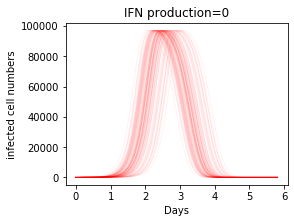

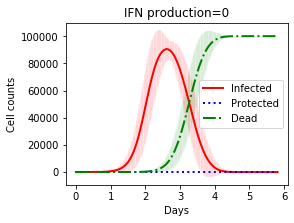

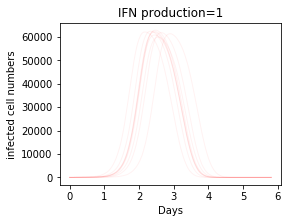

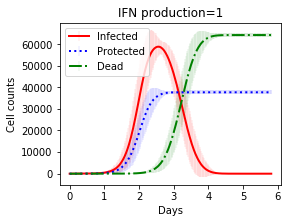

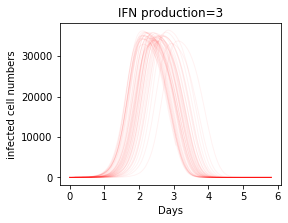

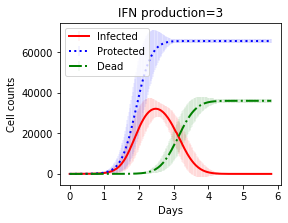

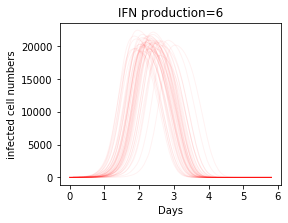

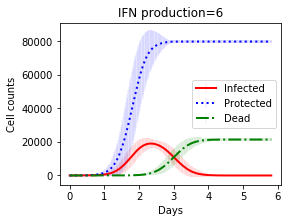

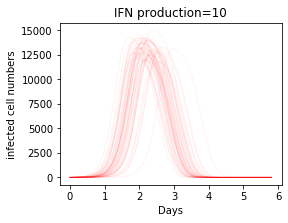

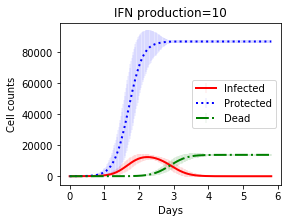

In [25]:
ivirus_prods=2
ivirus_diff=1
ifn_prods=[0,1,3,6,10]
iifn_diff=5
iifn_prob=0.1
ivirus_reduction=0.5
s1=1
s2=1
vnumb=1
total =[]

for iifn_prods in ifn_prods:
    path1 = "initial_virus/homogenous/1_1_1/{}".format(iifn_prods)
    #path2 = "initial_virus/homogenous/1_1_1/{}".format(iifn_prods)
    isstochastic=0
    df1=AllRead(path1,0,100,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb)
    #isstochastic=0
    #df2=AllRead(path2,0,100,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb)
    
    plottracks(df1,"infected") # plot tracks
    #plottracks(df2,"infected")
    dfmean1 = CalculateMean(df1)
    plotcells(dfmean1)
    dfmax1=CalculateMax(df1)
    total.append(dfmax1)
dfifnprods = pd.concat(total)

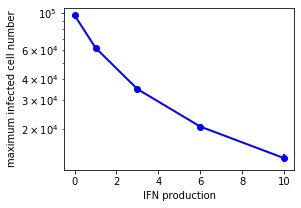

0

In [26]:
plot_max_IFN_PRODS(dfifnprods)

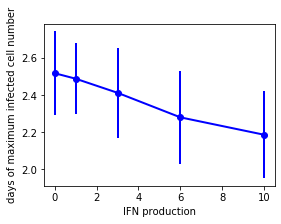

0

In [27]:
plot_argmax_IFN_PRODS(dfifnprods)

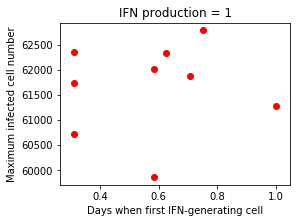

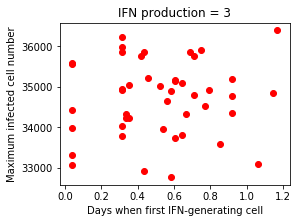

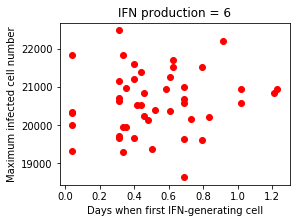

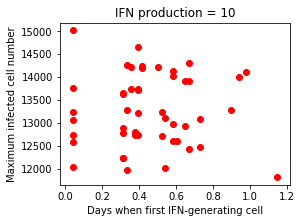

In [28]:
ifn_prods=[1,3,6,10]
s1=1
s2=1
vnumb=1
for iifn_prods in ifn_prods:
    path1 = "initial_virus/homogenous/1_1_1/{}".format(iifn_prods)
    isstochastic=0
    df1=AllRead(path1,0,100,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb)
    dfnew=CalculateFirstIFN(df1)
    plot_maxinfected_firstifn(dfnew)
